<a href="https://colab.research.google.com/github/fcalderan19/TA047R-2C2025-GRUPO02/blob/main/TA047R_TP1_GRUPO2_ENTREGA_EJ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 - Analisis exploratorio de Datos

## Grupo 2 - G2 - Integrantes:

- Calderan, Facundo Andres
- Merlinsky Camins, Mariano Gabriel
- Castellano Bogdan, Benjamin
- Yu, Fernando
- Pons Echeverria, Tomas

Para resolver este ejercicio, nos fueron asignados los datasets de viajes en taxis Yellow Cab en USA de los meses de Abril, Mayo y Junio del año 2024. Para comenzar a hacer el analisis exploratorio de los datos, vamos a importar las librerias que vamos a utilizar para procesarlos y leer los archivos en donde estan.

In [31]:
# Instalamos librerias que no vienen por defecto
!pip install meteostat

# Importamos librerias a utilizar durante el proceso
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
from datetime import datetime
from meteostat import Point, Daily


In [32]:
# Seteamos el formato de los numeros flotantes a 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)

#Leemos los 3 archivos .parquet
april = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-04.parquet")
may = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-05.parquet")
june = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-06.parquet")

# Concateno los archivos en un solo dataframe
data = pd.concat([april, may, june], axis=0, ignore_index=True)

del april, may, june

# Descargamos el dataset de las lluvias para análisis posterior
start = datetime(2024, 4, 1)
end = datetime(2024, 6, 30)
new_york = Point(40.7128, -74.0060)
rain = Daily(new_york, start, end)
rain = rain.fetch()

## Analisis exploratorio y preprocesamiento de datos

Primer acercamiento a los datos, vemos cantidad de filas y columnas.

Tambien vemos el tipo de dato de cada columna, y las primeras filas del dataset.


In [33]:
# Obtenemos la cantidad de filas y columnas del dataset
shape = data.shape
print(f"Cantidad de filas: {shape[0]}, cantidad de columnas:{shape[1]}\n")

Cantidad de filas: 10777315, cantidad de columnas:19



In [34]:
# Vemos la cantidad de columnas y su tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10777315 entries, 0 to 10777314
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

In [35]:
# Vemos las primeras 5 filas del dataframe
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-04-01 00:02:40,2024-04-01 00:30:42,0.00,5.20,1.00,N,161,7,1,29.60,3.50,0.50,8.65,0.00,1.00,43.25,2.50,0.00
1,2,2024-04-01 00:41:12,2024-04-01 00:55:29,1.00,5.60,1.00,N,264,264,1,25.40,1.00,0.50,10.00,0.00,1.00,37.90,0.00,0.00
2,2,2024-04-01 00:48:42,2024-04-01 01:05:30,1.00,3.55,1.00,N,186,236,1,20.50,1.00,0.50,5.10,0.00,1.00,30.60,2.50,0.00
3,2,2024-04-01 00:56:02,2024-04-01 01:05:09,1.00,1.06,1.00,N,137,164,2,10.00,1.00,0.50,0.00,0.00,1.00,15.00,2.50,0.00
4,1,2024-04-01 00:08:32,2024-04-01 00:10:24,1.00,0.70,1.00,N,236,263,1,5.10,3.50,0.50,2.00,0.00,1.00,12.10,2.50,0.00


### Variables:

Clasificamos las variables en: cualitativas (nominales u ordinales) y cuantitativas (discretas o continuas)

| Nombre                | Descripción                                                         | Tipo                  |  
|-----------------------|---------------------------------------------------------------------|-----------------------|
|vendorID               |Código que indica la compañía proveedora del registro.               |Cualitativa nominal    |
|passenger_count        |Cantidad de pasajeros en el viaje.                                   |Cuantitativa discreta  |
|trip_distance          |Distancia del viaje medida por el taxímetro, en millas.              |Cuantitativa continua  |
|ratecodeID             |Indica el tipo de tarifa en vigencia al final del viaje.             |Cualitativa nominal    |
|store_and_fwd_flag     |Indica si el viaje se guardó en memoria antes de enviarse al servidor|Cualitativa nominal    |
|PULocationID           |Zona TLC en la que comenzó a correr el taxímetro.                    |Cualitativa nominal    |
|DOLocationID           |Zona TLC en la que se detuvo el taxímetro.                           |Cualitativa nominal    |
|payment_type           |Código que indica el medio de pago utilizado                         |Cualitativa nominal    |
|fare_amount            |Tarifa calculada por el taxímetro                                    |Cuantitativa continua  |
|extra                  |Recargos y extras miscelaneos                                        |Cuantitativa continua  |
|mta_tax                |Impuesto que se agrega según el tipo de tarifa                       |Cuantitativa discreta  |
|tip_amount             |Monto de propina al conductor, no incluye efectivo                   |Cuantitativa continua  |
|tolls_amount           |Monto de todos los peajes recorridos.                                |Cuantitativa continua  |
|improvement_surcharge  |Recargo en la bajada de bandera para mejoras del servicio            |Cuantitativa discreta  |
|total_amount           |Monto total que se le cobra al pasajero, no incluye propina          |Cuantitativa continua  |
|congestion_surcharge   |Monto total recaudado por el recargo de congestión                   |Cuantitativa discreta  |
|Airport_fee            |Extra que se aplica a recogidas en JFK y Laguardia                   |Cuantitativa discreta  |
|tpep_pickup_datetime   |Fecha y hora en la que comenzó a correr el taxímetro.                |Cuantitativa continua  |
|tpep_dropoff_datetime  |Fecha y hora en la que se detuvo el taxímetro.                       |Cuantitativa continua  |




In [36]:
cuantitativas = ['passenger_count', 'trip_distance', 'fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee','tpep_pickup_datetime','tpep_dropoff_datetime']

# Vemos las medidas de resumen de las variables cuantitativas
data[cuantitativas].describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,tpep_pickup_datetime,tpep_dropoff_datetime
count,9553292.00,10777315.00,10777315.00,10777315.00,10777315.00,10777315.00,10777315.00,10777315.00,10777315.00,9553292.00,9553292.00,10777315,10777315
mean,1.33,5.29,19.39,1.40,0.48,3.27,0.56,0.97,27.94,2.24,0.15,2024-05-16 06:26:25.528043,2024-05-16 06:43:58.961711
min,0.00,0.00,-1285.40,-7.50,-0.50,-99.01,-117.26,-1.00,-1315.97,-2.50,-1.75,2002-12-31 16:46:07,2002-12-31 17:24:07
25%,1.00,1.05,9.30,0.00,0.50,0.00,0.00,1.00,15.95,2.50,0.00,2024-04-23 16:00:16.500000,2024-04-23 16:18:24
50%,1.00,1.80,14.20,1.00,0.50,2.58,0.00,1.00,21.00,2.50,0.00,2024-05-15 22:10:24,2024-05-15 22:27:00
75%,1.00,3.40,22.60,2.50,0.50,4.20,0.00,1.00,30.60,2.50,0.00,2024-06-07 19:13:32,2024-06-07 19:30:17
max,9.00,270766.80,334076.32,65.99,25.00,747.47,1702.88,1.00,334145.30,2.52,1.75,2026-06-26 23:53:12,2026-06-27 20:59:10
std,0.82,425.44,104.70,1.83,0.12,4.08,2.29,0.24,105.68,0.85,0.50,NaN,NaN


In [37]:
# Reemplazamos los variables catégoricas numéricas por su versión en texto para mejor legibilidad.

# Diccionarios para reemplazar los valores numericos por su versión categórica
vendorID_map = {1: 'Creative Mobile Technologies, LLC', 2: 'Curb Mobility, LLC', 6: 'Myle Technologies Inc', 7: 'Helix'}
ratecodeID_map = {1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated fare', 6: 'Group ride', 99: np.nan}
payment_type_map = {0: 'Flex Fare trip',1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'}

# data.isnull().sum()

data['VendorID'] = data['VendorID'].replace(vendorID_map)
data['RatecodeID'] = data['RatecodeID'].replace(ratecodeID_map)
data['payment_type'] = data['payment_type'].replace(payment_type_map)


### Relaciones entre variables

Una vez que tenemos las variables, buscamos relaciones entre ellas

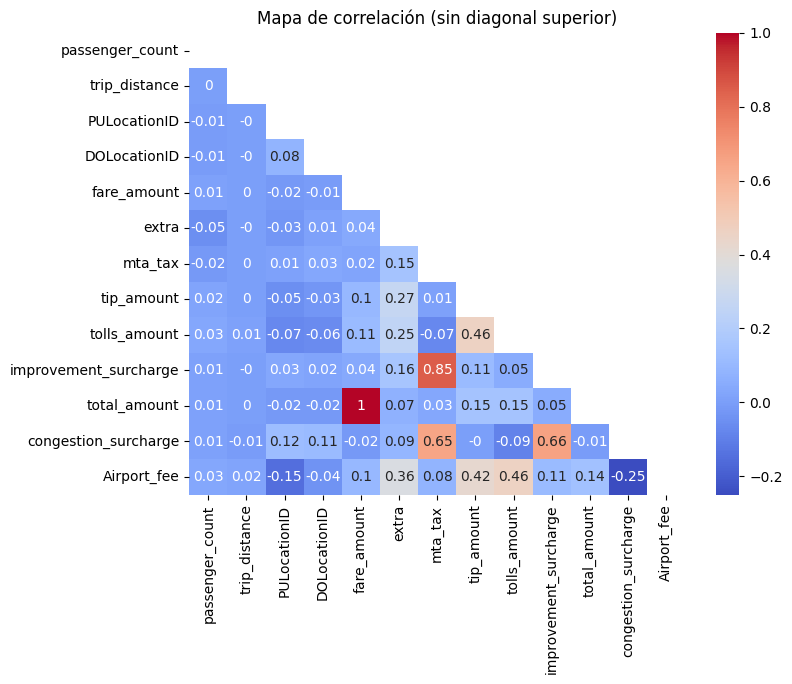

In [38]:
# Calculamos el mapa de correlación, descartando las variables categóricas
corr = data.corr(numeric_only=True).round(2)

# #Graficamos el heatmap
plt.figure(figsize=(8, 6))
plt.title('Mapa de correlación (sin diagonal superior)')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)

plt.show()


Una vez obtenido el heatmap de correlaciones, podemos observar que la mayoría de variables presentan coeficientes cercanos a 0. Esto indica que son prácticamente independientes entre sí (por ejemplo, passenger_count respecto a la mayoría, o PULocationID y DOLocationID, que en realidad son variables categóricas codificadas como números y, por tanto, no deberían mostrar correlación numérica).

No obstante, existen algunas relaciones destacables, evidenciadas por los tonos más cálidos en el gráfico. La más relevante es la fuerte correlación entre `fare_amount` y `total_amount`, lo cual es lógico, ya que la tarifa base constituye la mayor parte del monto total, al que posteriormente se suman recargos e impuestos. El coeficiente es 1, por lo que indica que hay una relación lineal positiva perfecta entre estas dos. También se observan asociaciones notables entre `tolls_amount` y `total_amount`, así como entre `congestion_surcharge` y `total_amount`, ambas coherentes con la manera en que se compone el importe final.
Por último, cabe señalar la relación entre `Airport_fee` y variables como `fare_amount` o `tolls_amount`, lo que refleja que los trayectos desde o hacia aeropuertos suelen ser más largos y con mayor probabilidad de incluir peajes.

Aunque existen otras correlaciones menores, hemos optado por destacar únicamente las más significativas y con una interpretación clara.


Es interesante observar lo siguiente: `fare_amout` y `total_amount` tienen una correlación positiva perfecta, lo cual no es casualidad.
Sabiendo que fare_amount es la tarifa calculada en base a la distancia recorrida, y el total_amount es la tarifa final que se cobra, que le agrega el fare_amount impuestos y costos adicionales, tiene sentido pensar que total_amount es una combinacion lineal de fare_amount.

Para cada viaje, podemos calcular el total_amount en base al fare_amount y costos adicionales, asi que no vamos a considerar la columna total_amout para este analisis, ya que nos esta dando informacion redundante.


In [39]:
data.drop('total_amount', axis=1, inplace=True)
cuantitativas.remove('total_amount')

## Valores faltantes

In [40]:
# Miramos cuantos valores faltantes tenemos en el dataset
data.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,1224023
trip_distance,0
RatecodeID,1342097
store_and_fwd_flag,1224023
PULocationID,0
DOLocationID,0
payment_type,0


Cuando miramos los valores faltantes en nuestro dataset, es muy interesante remarcar que las columnas "passenger_count", "store_and_fwd_flag", "congestion_surcharge", "Airport_fee", tienen la misma cantidad de nulos. Sin embargo, podemos ver como "RatecodeID" tambien tiene una gran cantidad de nulos.

Vamos a ver mas en detalle la relacion entre estas cinco columnas

In [41]:
cols_con_nulos = ['passenger_count', 'store_and_fwd_flag','congestion_surcharge', 'Airport_fee', 'RatecodeID']

# Comprobamos si las filas nulas coinciden
coinciden = data[cols_con_nulos].isnull().all(axis=1).sum()
print(f"Filas donde todas estas columnas son nulas: {coinciden}")

Filas donde todas estas columnas son nulas: 1224023


Con analizar las filas que corresponden a las que presentan valores nulos en dos columnas por separado, y luego haciendo la suma de filas, nos damos cuenta que los valores faltantes de las cinco variables que nombramos antes estan en las mismas filas, lo cual nos puede indicar una correlacion entre la falta de estos valores.

Ademas, nos damos cuenta gracias a la tabla de cantidad de nulos realizada anteriormente que la columna RatecodeID no solo es nula cuando el resto de las cuatro columnas lo son, sino que tambien, presenta valores faltantes en aproximadamente otras 100.000 filas.






Para reducir la cantidad de nulos en el dataset vamos a analizar columna por columna las posibles imputaciones de valores:

**Airport_fee**: Esta variable tiene dos posibles valores: 1,75 si el viaje comienza (`PULocationID`) en el JFK Airport (132) o LaGuardia Airport (138). El otro posible valor es 0.00 en cualquier otro caso.


Por ende, analizaremos para los valores nulos estas condiciones e imputaremos el valor correspondiente

In [42]:
# Leemos el csv de locations para saber cuales IDs son de aeropuertos
locations = pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv')
airports = locations[locations['service_zone'] == 'Airports']
airports_ID = set(airports['LocationID'])

In [43]:
# Si la columna de Airport_fee es nula y el viaje comienza en un aeropuerto, reemplazamos el valor por 1.75. En caso contrario, dejamos el valor original.
data['Airport_fee'] = np.where((data['Airport_fee'].isnull()) & (data['PULocationID'].isin(airports_ID)), 1.75, data['Airport_fee'])

# El resto de nulos que no cumple la condicion de arriba deberia valer 0.00
data['Airport_fee'] = np.where(data['Airport_fee'].isnull(), 0.00, data['Airport_fee'])

**passenger_count**: como no tenemos ninguna columna que nos ayude como referencia de posibles valores para reemplazar los nulos, debemos realizar una sustitucion por media o mediana. Debido a que esta columna todavia tiene valores invalidos como viajes con cero o nueve pasajeros, esta imputacion de datos la haremos luego de limpiar la columna de valores atipicos.

**store_and_fwd_flag**: la informacion que nos da esta columna no nos es para nada util ya que no nos aporta informacion para la relacion con otras columnas y mismo su informacion es interna de cómo es el sistema de taxis y no del viaje ni del costo del mismo. Por lo que no la utilizaremos para analisis futuros entonces la eliminaremos.

In [44]:
# Borramos la columna
data.drop('store_and_fwd_flag', axis=1, inplace=True)

**congestion_surcharge**: esta columna nos aporta información acerca del recorrido del viaje, si empezó, terminó o transitó por cualquier barrio al sur de manhattan (al sur de la 96th street) entonces se le cobra 0.75 (si el viaje es compartido) ó 2.50 en viajes comunes.

In [45]:
# Zonas al sur de manhattan
south_manhattan_zones = ['Alphabet City', 'Battery Park', 'Battery Park City', 'Central Park', 'Chinatown', 'Clinton East', 'Clinton West', 'East Chelsea', 'East Village', 'Financial District North', 'Financial District South', 'Flatiron', 'Garment District', "Governor's Island/Ellis Island/Liberty Island", 'Gramercy', 'Greenwich Village North', 'Greenwich Village South', 'Hudson Sq', 'Kips Bay', 'Lenox Hill East', 'Lenox Hill West', 'Lincoln Square East', 'Lincoln Square West', 'Little Italy/NoLiTa', 'Lower East Side', 'Meatpacking/West Village West', 'Midtown Center', 'Midtown East', 'Midtown North', 'Midtown South', 'Murray Hill', 'Penn Station/Madison Sq West', 'Seaport', 'SoHo', 'Stuy Town/Peter Cooper Village', 'Sutton Place/Turtle Bay North', 'Times Sq/Theatre District', 'TriBeCa/Civic Center', 'Two Bridges/Seward Park', 'UN/Turtle Bay South', 'Union Sq', 'Upper East Side North', 'Upper East Side South', 'Upper West Side North', 'Upper West Side South', 'West Chelsea/Hudson Yards', 'West Village', 'World Trade Center', 'Yorkville East', 'Yorkville West']

# Obtenemos los id de cada zona
south_manhattan = locations[locations['Zone'].isin(south_manhattan_zones)]
south_manhattan_ID = set(south_manhattan['LocationID'])

# Inputamos los datos
data['congestion_surcharge'] = np.where((data['congestion_surcharge'].isnull()) & (data['PULocationID'].isin(south_manhattan_ID) | data['DOLocationID'].isin(south_manhattan_ID)), np.where((data['RatecodeID'] == 'Group ride'), 0.75, 2.50), data['congestion_surcharge'])
data['congestion_surcharge'] = np.where((data['congestion_surcharge'].isnull()), 0.00, data['congestion_surcharge'])

**RatecodeID**: esta columna indica la tarifa vigente al momento de terminar el viaje, por lo que según el destino, podremos imputar algunos valores.

In [46]:
JFK_ID = locations[locations['Zone'] == 'JFK Airport']['LocationID'].item()
NEWARK_ID = locations[locations['Zone'] == 'Newark Airport']['LocationID'].item()
LAGUARDIA_ID = locations[locations['Zone'] == 'LaGuardia Airport']['LocationID'].item()
OUT_NYC_ID = locations[locations['Zone'] == 'Outside of NYC']['LocationID'].item()
MANHATTAN_IDS = locations[locations['Borough'] == 'Manhattan']['LocationID'].tolist()
NYC_NO_MANHATTAN_IDS = locations[locations['Borough'] != 'Manhattan']['LocationID'].tolist()
NYC_NO_MANHATTAN_IDS.remove(OUT_NYC_ID)

#Viajes entre JFK y Manhattan se computan como JFK
data['RatecodeID'] = np.where((data['RatecodeID'].isnull() & ((data['PULocationID'].isin(MANHATTAN_IDS) & data['DOLocationID'] == JFK_ID) | (data['PULocationID'] == JFK_ID & data['DOLocationID'].isin(MANHATTAN_IDS))) ), 'JFK', data['RatecodeID'])
#Viajes entre JFK y NYC (no Manhattan) se computan como Standard Rate
data['RatecodeID'] = np.where(data['RatecodeID'].isnull() & ((data['PULocationID'].isin(NYC_NO_MANHATTAN_IDS) & data['DOLocationID'] == JFK_ID) | (data['PULocationID'] == JFK_ID & data['DOLocationID'].isin(NYC_NO_MANHATTAN_IDS))), 'Standard Rate', data['RatecodeID'])
#Viajes desde o hacia Newark se computan como Newark
data['RatecodeID'] = np.where((data['RatecodeID'].isnull() & ((data['DOLocationID'] == NEWARK_ID) | (data['PULocationID'] == NEWARK_ID))), 'Newark', data['RatecodeID'])
#Viajes desde o hacia LaGuardia se computan como Standard Rate
data['RatecodeID'] = np.where((data['RatecodeID'].isnull() & ((data['DOLocationID'] == LAGUARDIA_ID) | (data['PULocationID'] == LAGUARDIA_ID))), 'Standard Rate', data['RatecodeID'])
#Viajes fuera de Nueva York se computan como Negotiated Fare
data['RatecodeID'] = np.where((data['RatecodeID'].isnull() & ((data['DOLocationID'] == OUT_NYC_ID) | (data['PULocationID'] == OUT_NYC_ID))), 'Negotiated fare', data['RatecodeID'])

(data['RatecodeID'].isnull().sum() / data.shape[0]) * 100

np.float64(12.289201902329106)

In [47]:
(data['RatecodeID'].isnull().sum() / data.shape[0]) * 100

np.float64(12.289201902329106)

A pesar de la imputación, nos quedó aproximadamente un 12% de nulos.

## Valores Atípicos

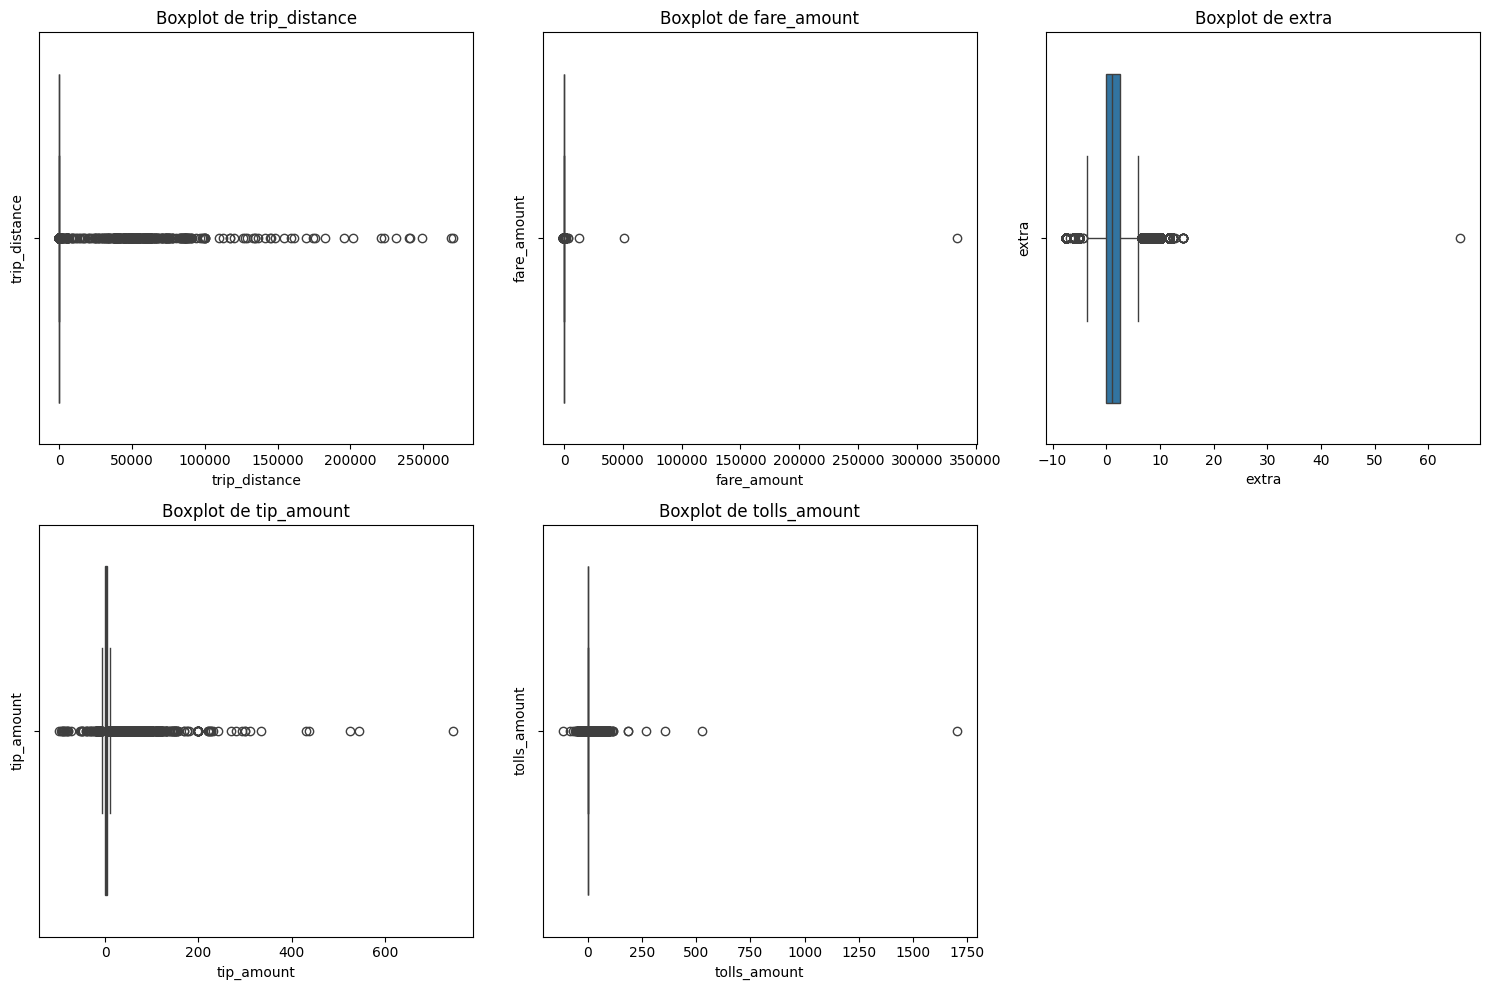

In [48]:
# Box-plots para ver los valores atípicos de las variables numéricas continuas
numericas_continuas = ['trip_distance','fare_amount','extra', 'tip_amount', 'tolls_amount']
numericas_discretas = ['passenger_count', 'mta_tax', 'improvement_surcharge','congestion_surcharge','Airport_fee']
numericas = numericas_continuas + numericas_discretas
def box_plot(variables: list[str]):
  n_cols = 3
  n_rows = (len(variables) + n_cols - 1) // n_cols

  # Crear figura y ejes
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
  axes = axes.flatten()

  # Graficar para cada columna
  for i, col in enumerate(variables):
      sns.boxplot(data=data, x= col, ax=axes[i])
      axes[i].set_title(f'Boxplot de {col}')
      axes[i].set_ylabel(col)

  # Ocultar graficos vacios
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

box_plot(numericas_continuas)


Se puede ver como hay valores atípicos para todas las variables. Para estas variables continuas, que hayan valores menores a 0 lleva a pensar que los datos fueron erroneamente cargados, y que no tiene sentido tenerlos en cuenta. Tambien fijamos un techo para variables que presentan outliers superiores descabellados.


In [49]:
# Nos deshacemos de valores negativos en todas las columnas numericas
for col in numericas:
    data = data[data[col] >= 0]


# Limitamos la cantidad de millas por viaje a 100
data = data[data['trip_distance'] < 100 ]

# Limitamos el monto de la tarifa por viaje a 500
data = data[data['fare_amount'] < 300]

# Limitamos el monto de la propina por viaje a 100
data = data[data['tip_amount'] < 100 ]

# Limitamos el monto de los peajes por viaje a 100
data = data[data['tolls_amount'] < 100]

# Filtramos por que las filas sean del periodo de tiempo analizado, evitando otras fechas.
months = [4,5,6]
data = data[(data['tpep_pickup_datetime'].dt.year == 2024) &
                     (data['tpep_pickup_datetime'].dt.month.isin(months)) & (data['tpep_dropoff_datetime'].dt.year == 2024) &
                     (data['tpep_dropoff_datetime'].dt.month.isin(months))]

# Limitamos la cantidad de pasajeros entre 0 y 6.
data = data[(data['passenger_count'] >= 0) & (data['passenger_count'] < 7)]

# Improvemente surcharge solamente puede ser 0.0 o 1.0
improv_surcharge = [0.0, 1.0]
data = data[data['improvement_surcharge'].isin(improv_surcharge)]

# Congestion surcharge solamente puede ser 0.0, 0.75 o 2.5
cong_surcharge = [0.0, 0.75, 2.5]
data = data[data['congestion_surcharge'].isin(cong_surcharge)]

# MTA tax solamente puede ser 0.0 o 0.5
mta_tax = [0.0, 0.5]
data = data[data['mta_tax'].isin(mta_tax)]

# Airport fee solamente puede ser 0.0 o 1.75
airport_fee = [0.0, 1.75]
data = data[data['Airport_fee'].isin(airport_fee)]

Comenzamos a inputar los outliers moderados

In [50]:
# Calculamos la moda entre los valores válidos
valid_passenger = [1,2,3,4,5]
mode = data[data['passenger_count'].isin(valid_passenger)]['passenger_count'].mode()[0]

# Imputamos outliers moderados (0,6) y nulos por la moda
data['passenger_count'] = data['passenger_count'].replace([0.0, 6.0, np.nan], mode)


Ahora, calculamos el Z-Score de las variables numéricas continuas.


In [51]:
# Diccionarios para guardar outliers
outliers_moderados = {}
outliers_extremos = {}
for var in numericas_continuas:
    data[f'z_score_{var}'] = np.abs(stats.zscore(data[var]))

    # Moderados entre 3 y 3.5
    outliers_moderados[var] = data[
        (data[f'z_score_{var}'] > 3) & (data[f'z_score_{var}'] <= 3.5)
    ]

    # Extremos mayores a 3.5
    outliers_extremos[var] = data[
        data[f'z_score_{var}'] > 3.5
    ]


# Contamos fila
total_moderados = 0
total_extremos = 0

for var in numericas_continuas:
    total_moderados += len(outliers_moderados[var])
    total_extremos += len(outliers_extremos[var])

# Calculamos porcentajes sobre el total del dataset
pct_moderados = (total_moderados/ len(data)) * 100
pct_extremos = (total_extremos / len(data)) * 100
pct_total = pct_moderados + pct_extremos

print(f"Outliers moderados (3 < z ≤ 3.5): {pct_moderados:.2f}%")
print(f"Outliers extremos (z > 3.5): {pct_extremos:.2f}%")
print(f"Total outliers (z > 3): {pct_total:.2f}%")

del outliers_extremos, outliers_moderados

Outliers moderados (3 < z ≤ 3.5): 5.59%
Outliers extremos (z > 3.5): 4.81%
Total outliers (z > 3): 10.40%


Debido a que eliminar los outliers con Z-Score mayor a 3 provocaría eliminar aproximadamente 10% del dataset, lo que haremos será borrar los outliers con un Z-Score mayor a 3.5, lo que implica un 4.81% del dataset. Mientras que imputamos los valores que tengan entre 3 y 3.5 de Z-Score

In [52]:
for var in numericas_continuas:
    z_score = f'z_score_{var}'

    data = data[data[z_score] <= 3.5] # Eliminamos registros con Z-Score mayor a 3.5

    mediana = np.median(data[var])
    data.loc[data[z_score] > 3, var] = mediana # Reemplazamos registros con Z-Score mayor a 3 con la mediana


## Nuevos Features

La lista de nuevos features generados fueron:

- weekday (monday, tuesday, etc). Indica el dia de la semana en la que el viaje fue realizado
- rain (boolean). Indica si el día del viaje llovió.

In [53]:
rain.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-04-01,10.10,8.90,12.00,2.20,0.00,<NA>,10.60,<NA>,1014.80,<NA>
2024-04-02,7.80,6.70,9.40,29.00,0.00,<NA>,16.50,<NA>,1013.60,<NA>
2024-04-03,6.00,5.60,6.70,36.40,0.00,<NA>,30.60,<NA>,1004.30,<NA>
2024-04-04,6.60,3.90,10.60,5.30,0.00,<NA>,12.60,<NA>,995.70,<NA>
2024-04-05,7.00,4.40,10.00,0.00,0.00,<NA>,9.50,<NA>,1003.80,<NA>


In [54]:
# Generamos weekday
data['weekday'] = data['tpep_pickup_datetime'].dt.day_name()

# Generamos rain
# Le agregamos la columna Date en vez de ser un índice
rain.reset_index(inplace=True)
rain.rename(columns={'time': 'Date'}, inplace=True)
rain['Date'] = pd.to_datetime(rain['Date']).dt.date
# Decimos que ese dia llovió si la precipitación es mayor que 0
rain['Rain Today'] = rain['prcp'] > 0
# Crear diccionario fecha -> lluvia
rain_dict = dict(zip(rain['Date'], rain['Rain Today']))

# Mapear directamente al DataFrame de viajes
data['Rain Today'] = data['tpep_pickup_datetime'].dt.date.map(rain_dict)

## Preguntas realizadas:

* ¿Los días de lluvia, aumenta la cantidad de viajes en taxi?

Para resolver esta pregunta utilizamos datos de meteostats, para la ciudad de Nueva York, durante los meses de abril, mayo y junio de 2024. Estos datos incluyen el volumen de precipitación en mm durante el día.

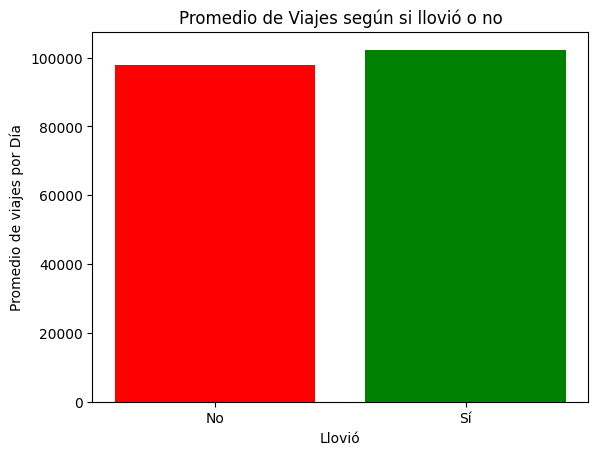

In [55]:
# Contar viajes por día
trips_per_day = data.groupby([data['tpep_pickup_datetime'].dt.date, 'Rain Today']).size().reset_index(name='trips_count')

# Calcular promedio de viajes por día según lluvia
avg_trips = trips_per_day.groupby('Rain Today')['trips_count'].mean().reset_index()
avg_trips['Rain Today'] = avg_trips['Rain Today'].map({True:'Sí', False:'No'})

plt.bar(avg_trips['Rain Today'].astype(str), avg_trips['trips_count'], color=['red','green'])
plt.xlabel('Llovió')
plt.ylabel('Promedio de viajes por Día')
plt.title('Promedio de Viajes según si llovió o no')
plt.show()

Como muestra el gráfico podemos ver que los días donde llovió, en promedio, hubo mayor cantidad de viajes que los días que no.

  * ¿ Que día de la semana hay más viajes? ¿Varía entre la semana y el fin de semana?

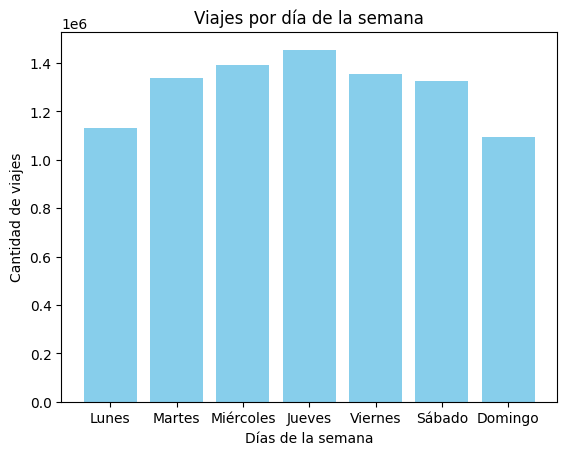

In [56]:
counts = data.groupby('weekday', observed=True).size().reset_index(name='trips_per_day')

# Traducir nombres al español
dias_dict = {
    'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles',
    'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado', 'Sunday':'Domingo'
}
counts['weekday'] = counts['weekday'].map(dias_dict)

# Ordenar de lunes a domingo
orden_dias = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
counts['weekday'] = pd.Categorical(counts['weekday'], categories=orden_dias, ordered=True)
counts = counts.sort_values('weekday')  # Ordenar según la categoría

# Graficar
plt.bar(counts['weekday'].astype(str), counts['trips_per_day'], color=['skyblue'])
plt.xlabel('Días de la semana')
plt.ylabel('Cantidad de viajes')
plt.title('Viajes por día de la semana')
plt.show()

Vemos que los jueves es el día de mayor cantidad de viajes, mientras que el domingo es el menor. Sorprende los lunes, el resto de los dias es parecido.

* ¿ Durante que horario/s es mayor en promedio la cantidad de pasajeros?

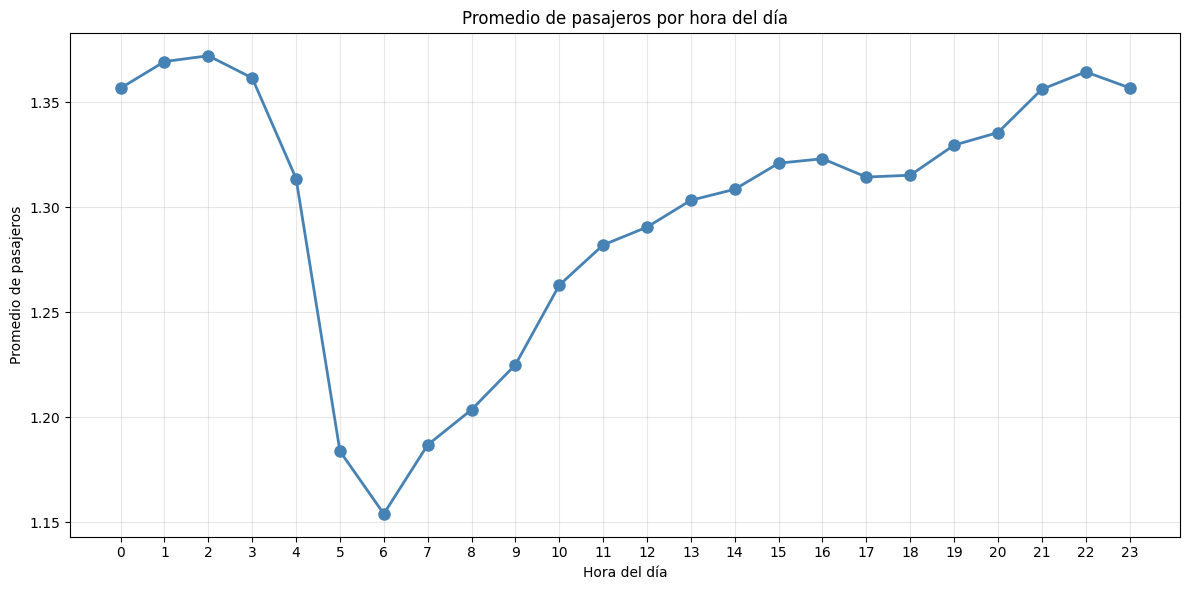

In [57]:
# Extraer la hora del pickup
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

# Calcular promedio de pasajeros por hora
avg_passengers_by_hour = data.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(avg_passengers_by_hour['pickup_hour'], avg_passengers_by_hour['passenger_count'], marker='o', linewidth=2, markersize=8, color='steelblue')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de pasajeros')
plt.title('Promedio de pasajeros por hora del día')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

Observamos que el promedio de pasajeros se mantiene relativamente constante a lo largo del día, con un valor cercano a 1.3-1.4 pasajeros por viaje. No se observan diferencias significativas entre horarios, lo que sugiere que la cantidad de pasajeros no varía sustancialmente según la hora del día. La mayoría de los viajes son individuales o con un acompañante.

* ¿Cuáles son las zonas más frecuentes de origen y destino? ¿Hay patrones de movilidad?

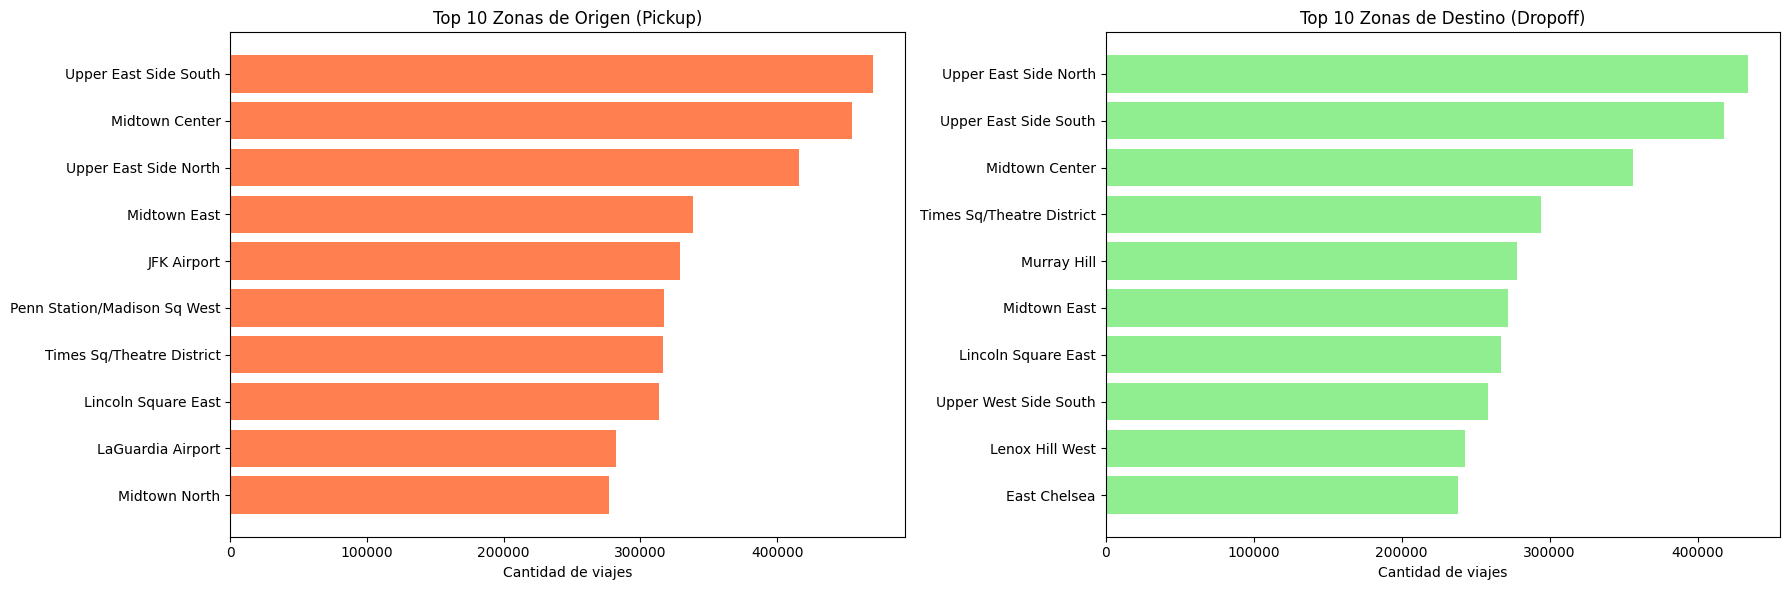

In [58]:
# Top 10 zonas de origen
top_pickup = data.groupby('PULocationID').size().reset_index(name='count').sort_values('count', ascending=False).head(10)
top_pickup = top_pickup.merge(locations[['LocationID', 'Zone']], left_on='PULocationID', right_on='LocationID')

# Top 10 zonas de destino
top_dropoff = data.groupby('DOLocationID').size().reset_index(name='count').sort_values('count', ascending=False).head(10)
top_dropoff = top_dropoff.merge(locations[['LocationID', 'Zone']], left_on='DOLocationID', right_on='LocationID')

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de origen
axes[0].barh(top_pickup['Zone'], top_pickup['count'], color='coral')
axes[0].set_xlabel('Cantidad de viajes')
axes[0].set_title('Top 10 Zonas de Origen (Pickup)')
axes[0].invert_yaxis()

# Gráfico de destino
axes[1].barh(top_dropoff['Zone'], top_dropoff['count'], color='lightgreen')
axes[1].set_xlabel('Cantidad de viajes')
axes[1].set_title('Top 10 Zonas de Destino (Dropoff)')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

Como podemos observar, las zonas más frecuentes tanto de origen como de destino se concentran en Manhattan, especialmente en áreas turísticas y comerciales. Las zonas más populares incluyen Upper East Side, Times Square/Theatre District, y Penn Station/Madison Square West. También notamos una alta frecuencia en los aeropuertos (LaGuardia y JFK), lo que refleja el uso intensivo de taxis para traslados aeroportuarios. Este patrón es consistente entre origen y destino, sugiriendo que estas zonas actúan como hubs de movilidad en la ciudad.

* ¿Cómo varía la demanda de taxis según la hora del día? ¿Hay horas pico?

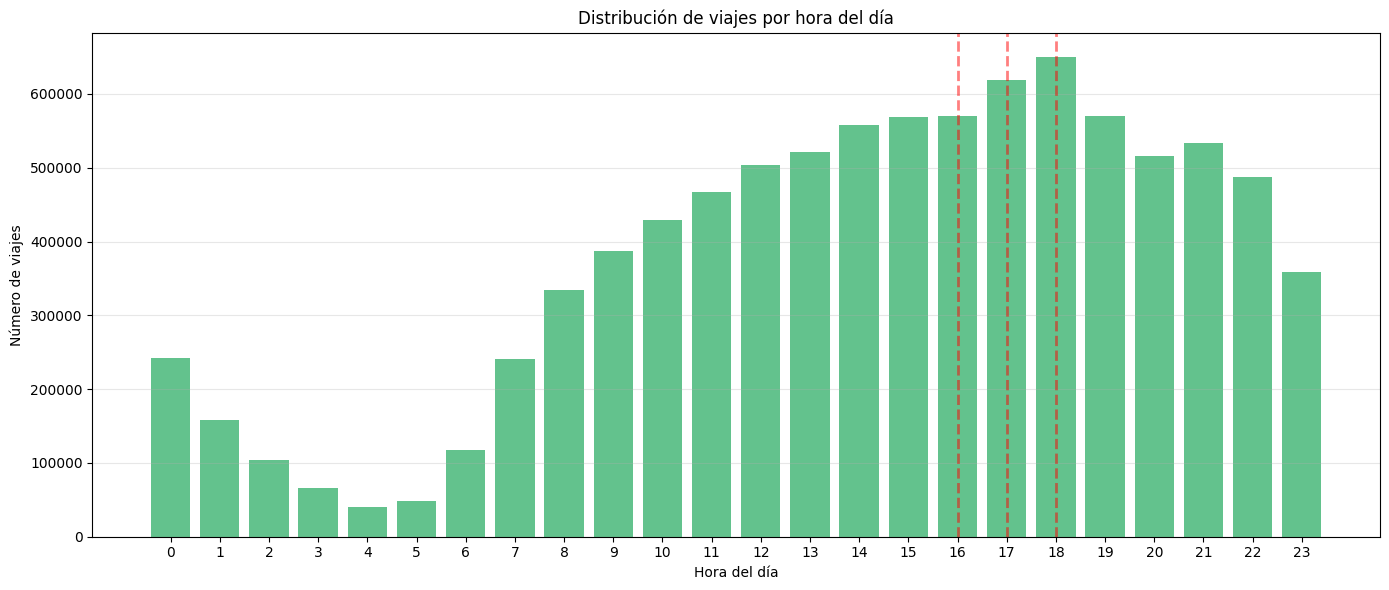

Horas pico (Top 3):
 pickup_hour  num_trips
          18     650278
          17     619136
          16     569837


In [59]:
# Contar viajes por hora
trips_by_hour = data.groupby('pickup_hour').size().reset_index(name='num_trips')

# Graficar
plt.figure(figsize=(14, 6))
plt.bar(trips_by_hour['pickup_hour'], trips_by_hour['num_trips'], color='mediumseagreen', alpha=0.8)
plt.xlabel('Hora del día')
plt.ylabel('Número de viajes')
plt.title('Distribución de viajes por hora del día')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)

# Marcar horas pico
peak_hours = trips_by_hour.nlargest(3, 'num_trips')
for _, row in peak_hours.iterrows():
    plt.axvline(x=row['pickup_hour'], color='red', linestyle='--', alpha=0.5, linewidth=2)

plt.tight_layout()
plt.show()

print("Horas pico (Top 3):")
print(peak_hours[['pickup_hour', 'num_trips']].to_string(index=False))

La demanda de taxis muestra un patrón claro a lo largo del día. Las horas pico se concentran en la tarde-noche (entre las 18:00 y 20:00), con el máximo alrededor de las 19:00 horas, coincidiendo con el horario de salida laboral y actividades nocturnas. También se observa un pico significativo entre las 14:00 y 16:00 horas. La demanda más baja ocurre durante la madrugada (4:00-5:00 AM), cuando la actividad en la ciudad es mínima. Este patrón es consistente con los comportamientos típicos de una ciudad metropolitana donde los taxis son utilizados principalmente para desplazamientos laborales y de entretenimiento.

* ¿Qué método de pago es más utilizado y cómo se relaciona con las propinas?


Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



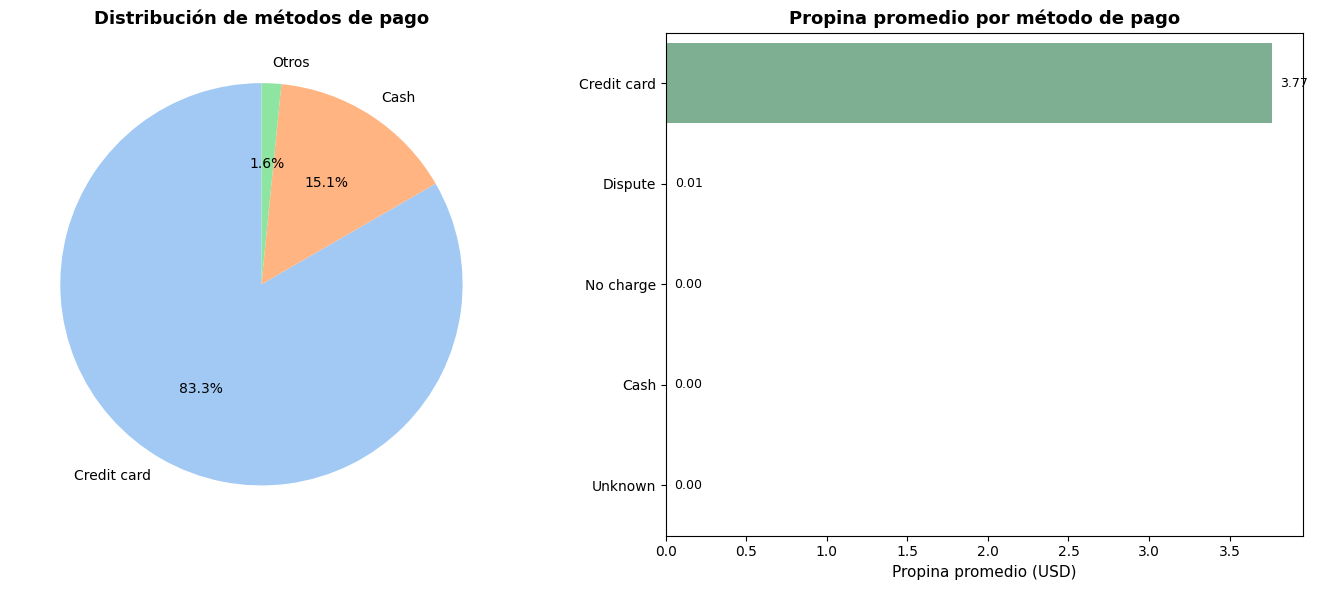


Estadísticas por método de pago:

Total de viajes por método:
  - Credit card     : 7574455 viajes (83.34%)
  - Cash            : 1370358 viajes (15.08%)
  - Dispute         :  95900 viajes (1.06%)
  - No charge       :  47903 viajes (0.53%)
  - Unknown         :      2 viajes (0.00%)

Propina promedio por método:
  - Credit card     : $3.77
  - Dispute         : $0.01
  - No charge       : $0.00
  - Cash            : $0.00
  - Unknown         : $0.00


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

payment_counts = data['payment_type'].value_counts()

threshold = len(data) * 0.05
small_cats = payment_counts[payment_counts < threshold]

if not small_cats.empty:
    payment_counts_grouped = payment_counts[payment_counts >= threshold].copy()
    payment_counts_grouped['Otros'] = small_cats.sum()
else:
    payment_counts_grouped = payment_counts

avg_tips = data.groupby('payment_type')['tip_amount'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Texto 1: Distribución de métodos de pago
colors = sns.color_palette('pastel')
axes[0].pie(
    payment_counts_grouped.values,
    labels=payment_counts_grouped.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'}
)
axes[0].set_title('Distribución de métodos de pago', fontsize=13, weight='bold')

# Texto 2: Propina promedio por método de pago
sns.barplot(
    x=avg_tips.values,
    y=avg_tips.index,
    ax=axes[1],
    palette='crest'
)
axes[1].set_xlabel('Propina promedio (USD)', fontsize=11)
axes[1].set_ylabel('')
axes[1].set_title('Propina promedio por método de pago', fontsize=13, weight='bold')

for i, v in enumerate(avg_tips.values):
    axes[1].text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nEstadísticas por método de pago:")
print("\nTotal de viajes por método:")
for metodo, cantidad in payment_counts.items():
    porcentaje = (cantidad / len(data)) * 100
    print(f"  - {metodo:<15} : {cantidad:>6} viajes ({porcentaje:.2f}%)")

print("\nPropina promedio por método:")
for metodo, tip in avg_tips.items():
    print(f"  - {metodo:<15} : ${tip:.2f}")


Los resultados muestran que **la tarjeta de crédito es el método de pago más utilizado**, representando la gran mayoría de los viajes. El efectivo ocupa el segundo lugar, seguido por otros métodos menos frecuentes.

En cuanto a las propinas, existe una diferencia significativa según el método de pago: los pagos con tarjeta de crédito registran propinas con un promedio de más de 3.50. Por otro lado, los pagos en efectivo muestran propinas promedio de 0. Las categorías "No charge" y "Dispute" naturalmente tienen propinas de 0.

Este análisis revela un sesgo importante en los datos: las propinas registradas solo reflejan aquellas pagadas electrónicamente, subestimando las propinas totales realmente otorgadas a los choferes.